In [3]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt 
matplotlib.rcdefaults()

matplotlib_rc = { 
    # 'text': {'usetex': True}, 
    'font': {'family': 'serif'} } # Apply changes for k, v in matplotlib_rc.items(): rc(k, **v)
for k, v in matplotlib_rc.items():
          rc(k, **v)

def plot_overlayed_umap_pca(X_adata_real, X_adata_generated, model_name, title_prefix="Dataset Comparison", dataset="pbmc3k"):
    """
    Computes and plots overlayed UMAP and PCA for real and generated datasets.

    Parameters:
    - adata_real (AnnData): Real dataset.
    - adata_generated (AnnData): Generated dataset.
    - title_prefix (str): Prefix for plot titles.

    Returns:
    - None, displays UMAP and PCA overlayed plots.
    """    
    # Concatenate the two datasets
    adata_combined = sc.AnnData(X=np.concatenate([X_adata_real, X_adata_generated], axis=0),
                               obs={"Dataset type": ["Real test set" for _ in range(X_adata_real.shape[0])] +
                                                 [model_name for _ in range(X_adata_generated.shape[0])]})

    adata_combined.obs = pd.DataFrame(adata_combined.obs)
    adata_combined.obs["Dataset type"] = pd.Categorical(adata_combined.obs["Dataset type"], categories=["Real test set", model_name], ordered=True)
    
    # Run PCA on combined dataset
    sc.pp.pca(adata_combined)
    
    # Run UMAP on combined dataset
    sc.pp.neighbors(adata_combined, use_rep="X_pca")  # UMAP typically works better on PCA-reduced data
    sc.tl.umap(adata_combined)
    
    # Plot PCA
    sc.pl.pca(adata_combined, show=False, color="Dataset type")
    plt.title(f"{title_prefix} - PCA")
    
    # Plot UMAP
    sc.pl.umap(adata_combined, color='Dataset type', show=False, save=f"{dataset}_{model_name}")
    plt.title(f"{title_prefix} - UMAP")


## Dentategyrus

In [6]:
adata_celldreamer_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/dentategyrus/generated_cells_0.h5ad")
adata_scvi_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/dentategyrus/generated/dentategyrus_0.h5ad")
adata_real_dent = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/dentategyrus/dentategyrus_test.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

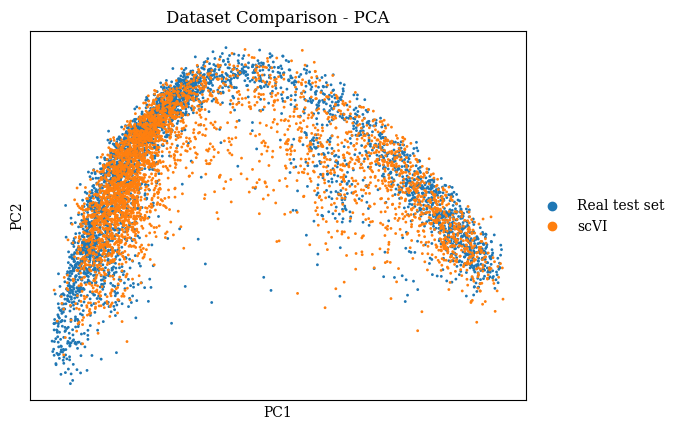

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


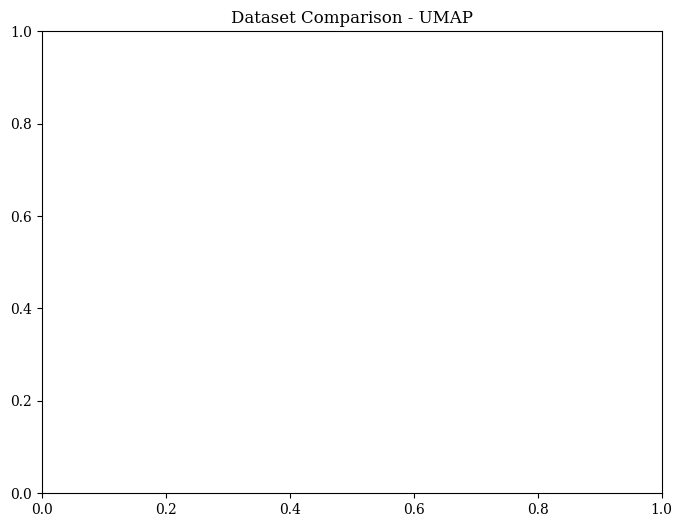

In [14]:
plot_overlayed_umap_pca(adata_real_dent.X.A, adata_scvi_dent.X, "scVI", title_prefix="Dataset Comparison",dataset= "dentate")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

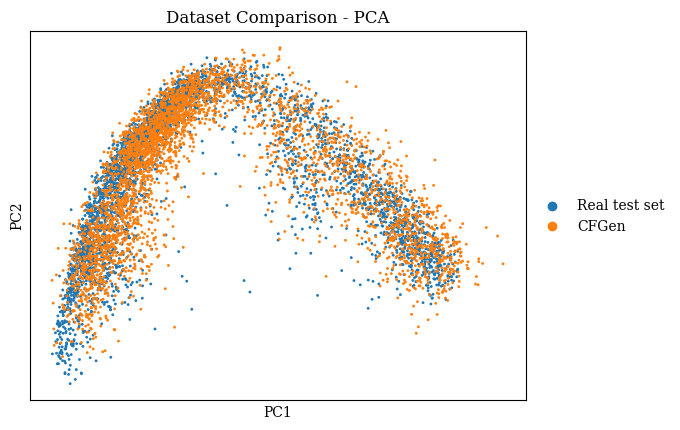

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


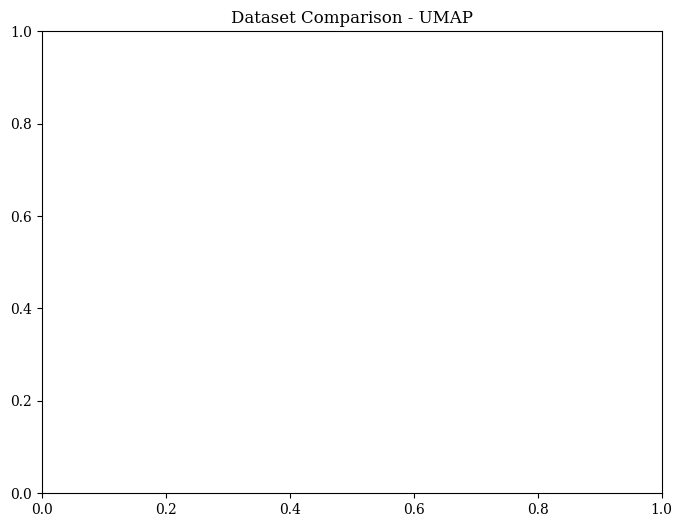

In [15]:
plot_overlayed_umap_pca(adata_real_dent.X.A, adata_celldreamer_dent.X.A, "CFGen", title_prefix="Dataset Comparison",dataset= "dentate")

## pbmc3k

In [16]:
adata_celldreamer_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/pbmc3k/generated_cells_0.h5ad")
adata_scvi_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/pbmc3k/generated/pbmc3k_0.h5ad")
adata_real_pbmc3k = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/pbmc3k/pbmc3k_test.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

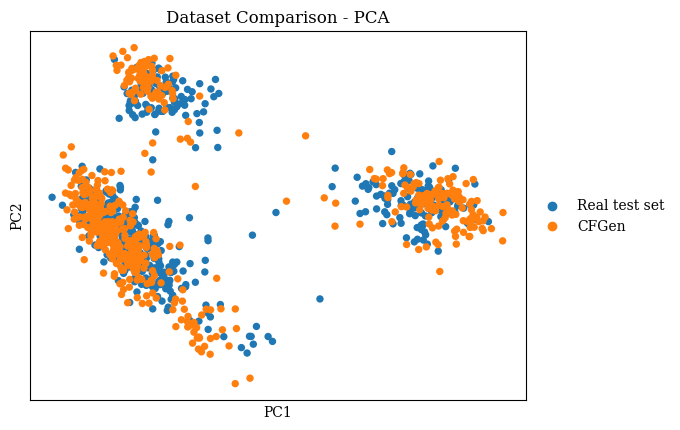

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


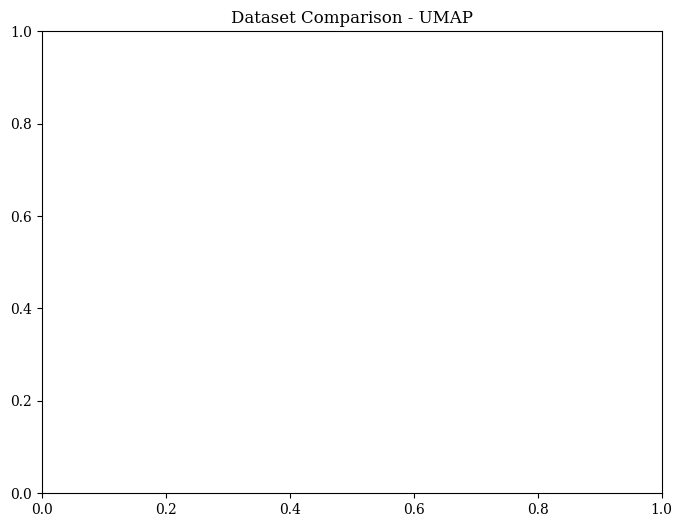

In [17]:
plot_overlayed_umap_pca(adata_scvi_pbmc3k.X, adata_real_pbmc3k.X.A, "CFGen", title_prefix="Dataset Comparison")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

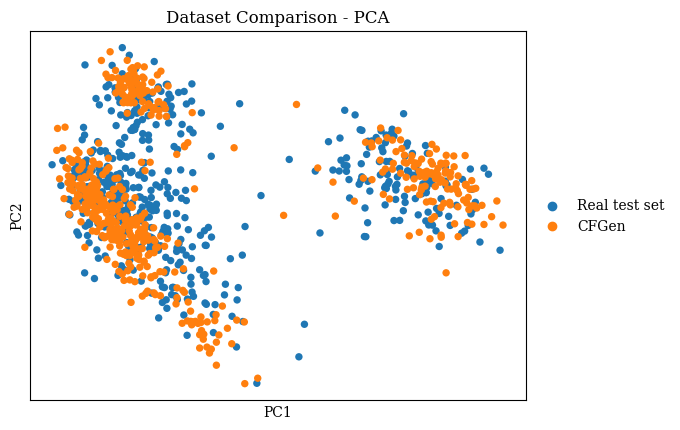

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


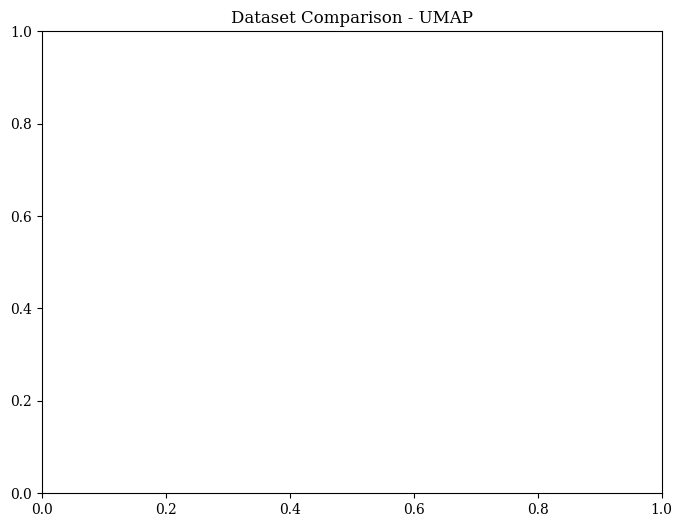

In [18]:
plot_overlayed_umap_pca(adata_celldreamer_pbmc3k.X.A, adata_real_pbmc3k.X.A, "CFGen", title_prefix="Dataset Comparison")

## Tabula Muris

In [19]:
adata_celldreamer_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/tabula_muris/generated_cells_0.h5ad")
adata_scvi_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/tabula_muris/generated/tabula_muris_0.h5ad")
adata_real_tabula_muris = sc.read_h5ad("/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/processed_full_genome/tabula_muris/tabula_muris_test.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

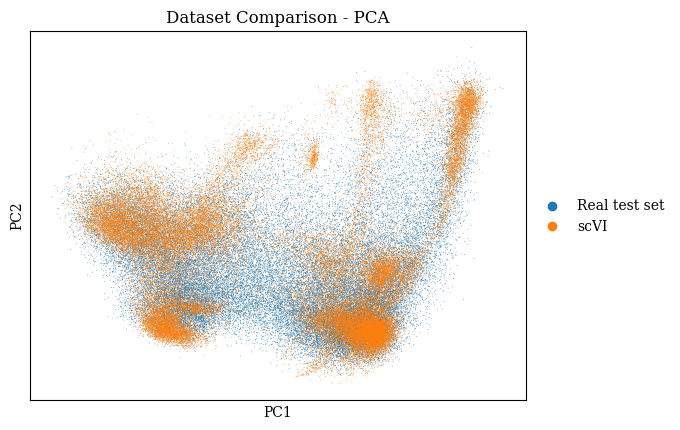

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


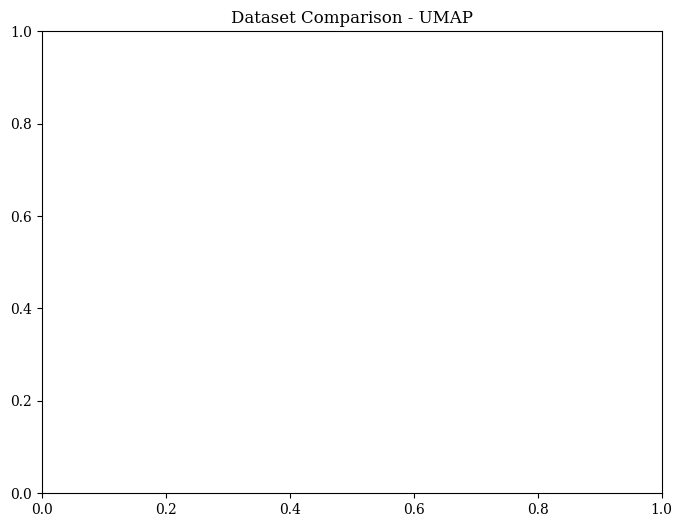

In [22]:
plot_overlayed_umap_pca(adata_scvi_tabula_muris.X, adata_real_tabula_muris.X.A, "scVI", title_prefix="Dataset Comparison",dataset= "tabula")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 800x600 with 0 Axes>

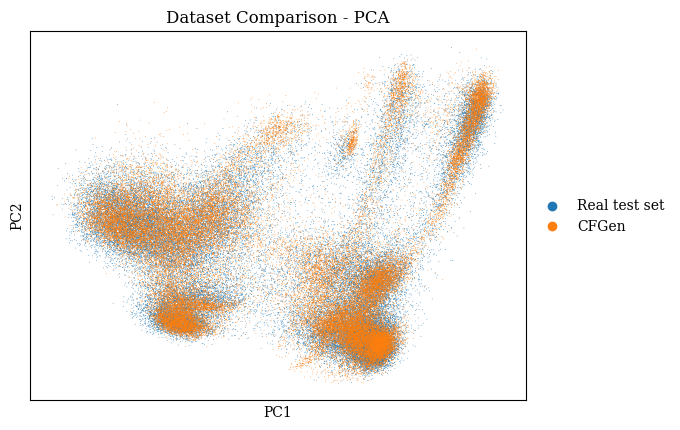

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


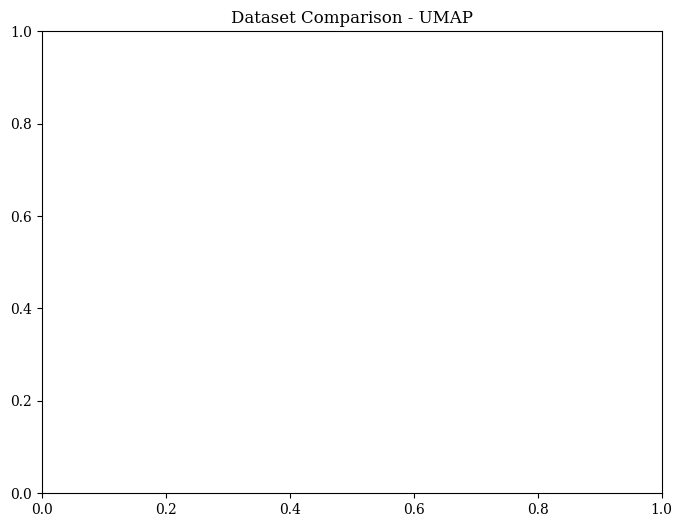

In [21]:
plot_overlayed_umap_pca(adata_celldreamer_tabula_muris.X.A, adata_real_tabula_muris.X.A, "CFGen", title_prefix="Dataset Comparison",dataset= "tabula")

## HLCA

In [23]:
from celldreamer.paths import DATA_DIR
data_path = DATA_DIR / 'processed_full_genome' / 'hlca_core' / 'hlca_core_test.h5ad'

In [ ]:
adata_celldreamer_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/datasets/generated/hlca_core/generated_cells_0.h5ad")
adata_scvi_hlca = sc.read_h5ad(f"/home/icb/alessandro.palma/environment/cfgen/project_folder/baseline_experiments/scvi/hlca_core/generated/hlca_core_0.h5ad")
adata_real_hlca = sc.read_h5ad(data_path)

In [ ]:
adata_real_hlca.X = adata_real_hlca.layers["X_counts"]
sc.pp.normalize_total(adata_real_hlca, target_sum=1e4)
sc.pp.log1p(adata_real_hlca)

In [21]:
plot_overlayed_umap_pca(adata_scvi_hlca.X, adata_real_hlca.X.A, "scVI", title_prefix="Dataset Comparison",dataset= "hlca")


KeyboardInterrupt



/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/pynndescent/pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/pynndescent/pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style'

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


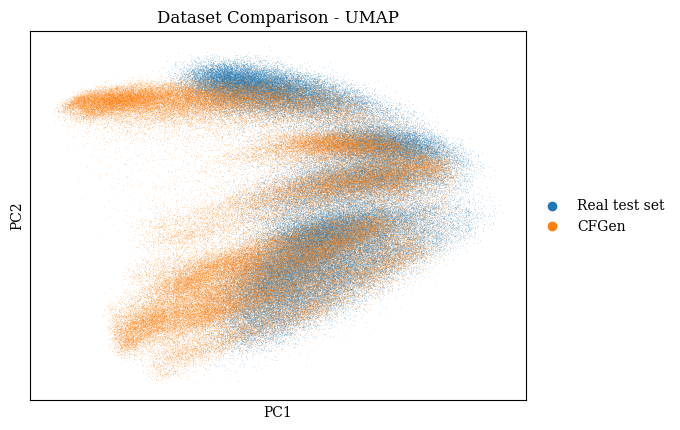

In [20]:
plot_overlayed_umap_pca(adata_celldreamer_hlca.X.A, adata_real_hlca.X.A, "CFGen", title_prefix="Dataset Comparison",dataset= "hlca")